In [1]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>

## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lib.noglobal import noglobal
import warnings
warnings.simplefilter("ignore")

In [3]:
def plot(df,lim=None,satelite_num=1):
    millis = "millisSinceGpsEpoch"
    recieved_time = "receivedSvTimeInGpsNanos"

    fig,axes = plt.subplots(1,3,figsize=(32,8))

    df = df[df["svid"]==satelite_num]


    df["interval"] =  df[millis] - df[recieved_time]/1000000
    
    if (lim==None):
        df["interval"].plot(ax = axes[0])
        df.groupby(millis).mean()["interval"].plot(ax = axes[1])
        df.groupby(millis).count()["interval"].plot(ax = axes[2])
    else:
        df["interval"].plot(ylim = lim,ax = axes[0])
        df.groupby(millis).mean()["interval"].plot(ax = axes[1],ylim = lim)
        df.groupby(millis).count()["interval"].plot(ax = axes[2])
        

    

## ハズレ値がない場合

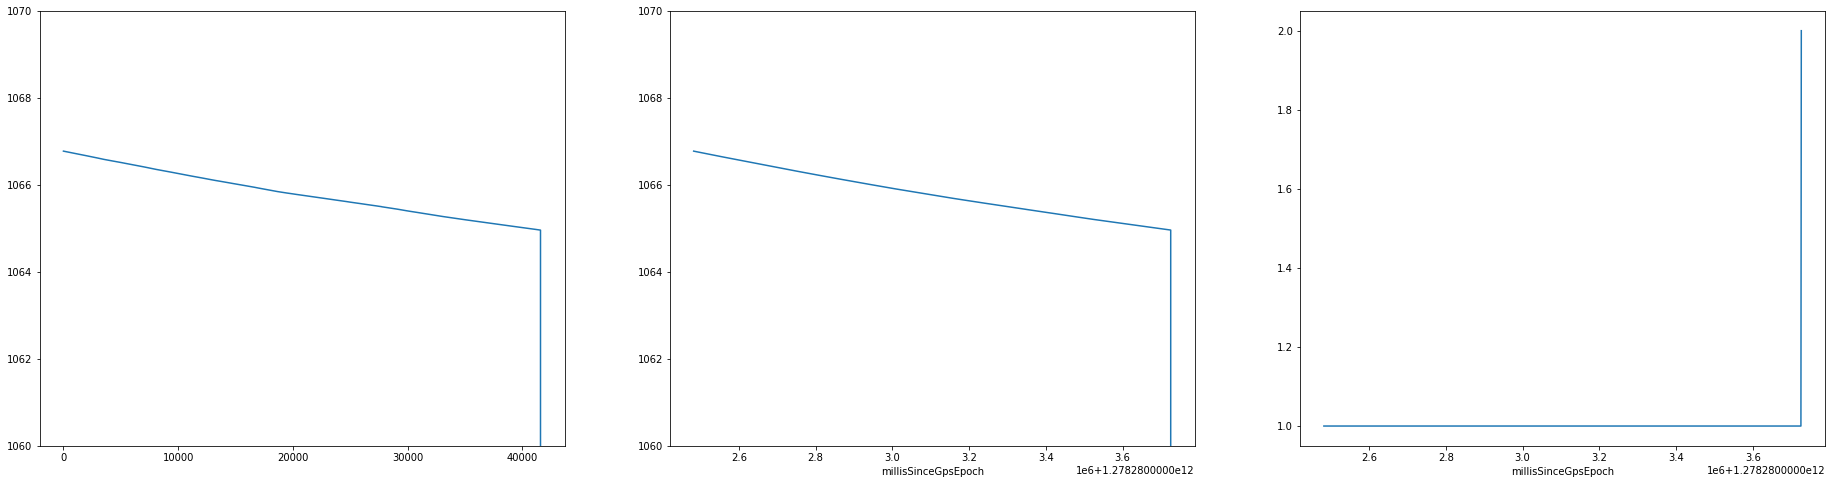

In [4]:
detapath = "/work/data/input/google-smartphone-decimeter-challenge/train/2020-07-08-US-MTV-1/Pixel4XLModded/Pixel4XLModded_derived.csv"
df_derived = pd.read_csv(detapath)
plot(df_derived,[1060,1070],1)

## ハズレ値がある場合

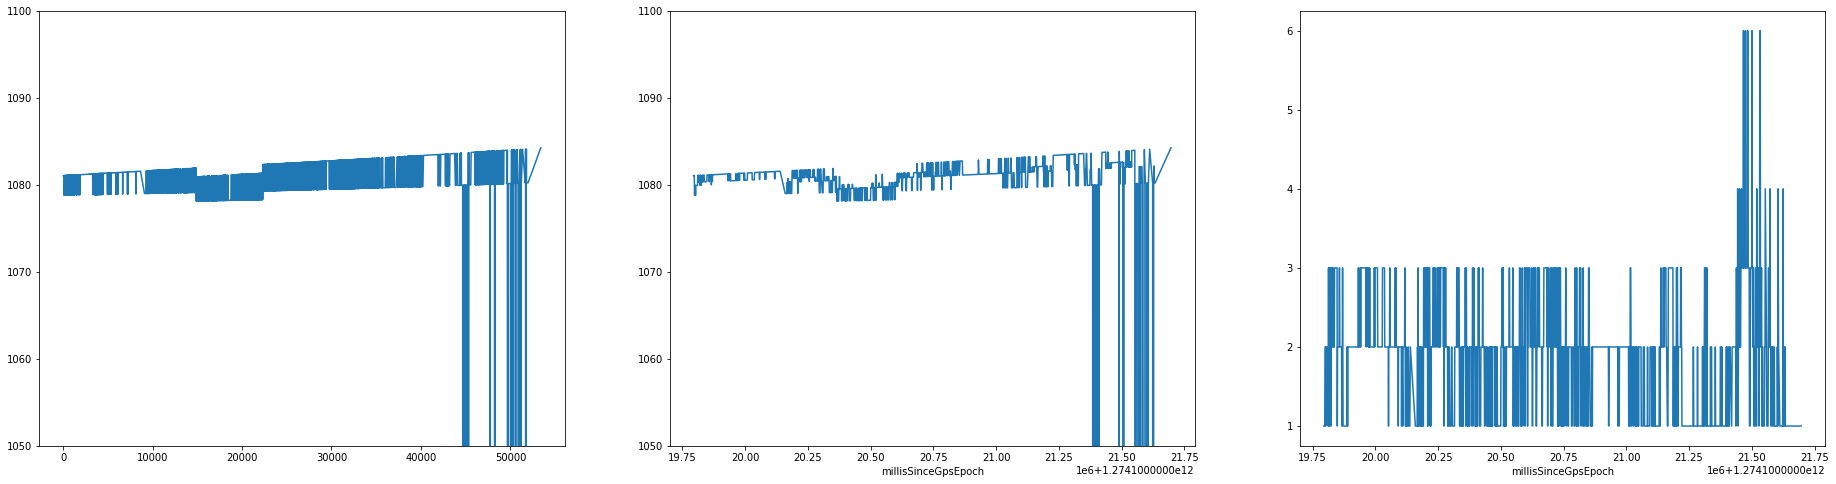

In [5]:
detapath = "/work/data/input/google-smartphone-decimeter-challenge/train/2020-05-21-US-MTV-1/Pixel4/Pixel4_derived.csv"

df_derived = pd.read_csv(detapath)
plot(df_derived,[1050,1100])

## 精度が悪い場合

精度が悪い場合、幅が長い？

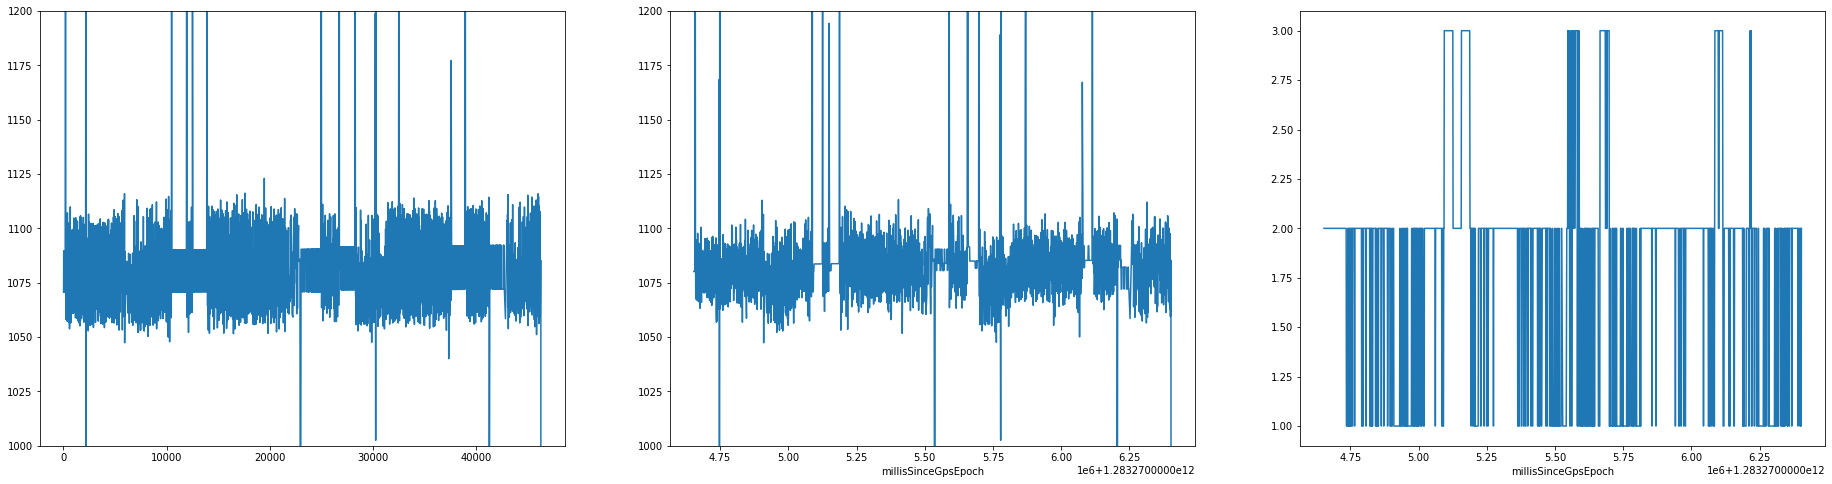

In [6]:
detapath = "/work/data/input/google-smartphone-decimeter-challenge/train/2020-09-04-US-SF-1/Pixel4/Pixel4_derived.csv"
df_derived = pd.read_csv(detapath)
plot(df_derived,[1000,1200])